     |████████████████████████████████| 125 kB 13.5 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 10.9 MB 38.0 MB/s 
     |████████████████████████████████| 58 kB 3.1 MB/s 
     |████████████████████████████████| 79 kB 3.3 MB/s 


     |████████████████████████████████| 136 kB 11.0 MB/s 


<Figure size 1224x864 with 0 Axes>

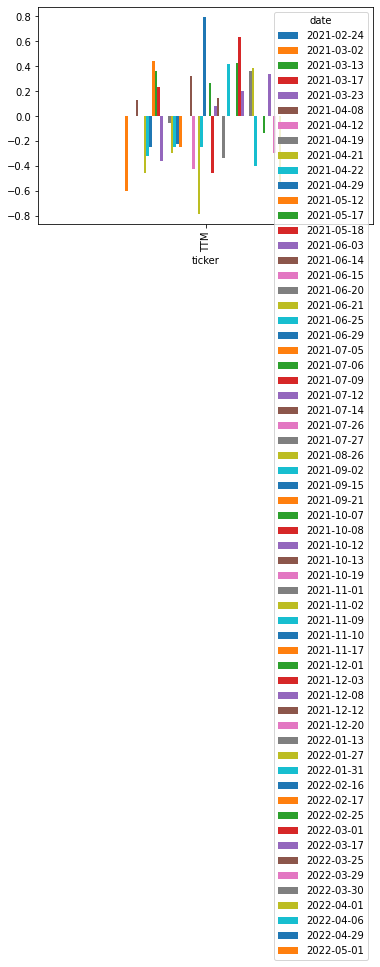

     |████████████████████████████████| 1.1 MB 13.8 MB/s 
     |████████████████████████████████| 144 kB 6.8 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 271 kB 65.9 MB/s 


ValueError: ignored

In [ ]:
import requests 
import urllib 
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

!pip install fastapi

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import requests 
import json 
import pandas as pd 
!pip install fsspec
from io import StringIO 

from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

finviz_url = 'https://finviz.com/quote.ashx?t='
# tickers = ['AMZN', 'GOOG', 'FB','TTM']
tickers = ['TTM']


news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')
        # full = row.td.text

        # temp = ''
        if len(date_data) == 1:
            time = date_data[0]
            # full = temp + date_data[0]  
        else:
            date = date_data[0]
            time = date_data[1]
            # temp = date_data[0]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

fig = plt.figure(figsize=(17,12))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show() 

# Count vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier 
## IMPLEMENTING BAG OF WORDS MODEL
countvector= CountVectorizer(ngram_range=(2,2))
traindataset= countvector.fit_transform(df['title']) # CONVERTING ALL THE HEADLINES INTO VECTORS

# DATA CONVERTS INTO SPARSE MATRIX
traindataset[0] 

api_key = 'MXPE0FUWB351UOXC'
!pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries 
import time 

ts = TimeSeries(key = api_key ,output_format = 'pandas')
data , metadata = ts.get_daily_adjusted(symbol = 'TTM')

In [ ]:
data1, metadata1 = ts.get_intraday(symbol = 'TTM') 

In [ ]:
data1.reset_index(level=0, inplace=True) 

data1.head()  

,date,1. open,2. high,3. low,4. close,5. volume
0,2022-05-03 16:00:00,28.56,28.650,28.54,28.55,82189.0
1,2022-05-03 15:45:00,28.57,28.625,28.53,28.58,16690.0
2,2022-05-03 15:30:00,28.66,28.665,28.55,28.57,13549.0
3,2022-05-03 15:15:00,28.63,28.690,28.63,28.67,10165.0
4,2022-05-03 15:00:00,28.48,28.660,28.45,28.65,19453.0


In [ ]:
data1.tail(5)

,date,1. open,2. high,3. low,4. close,5. volume
95,2022-04-28 14:00:00,28.330,28.380,28.33,28.38,5442.0
96,2022-04-28 13:45:00,28.380,28.440,28.32,28.33,12057.0
97,2022-04-28 13:30:00,28.448,28.467,28.35,28.38,19155.0
98,2022-04-28 13:15:00,28.360,28.450,28.33,28.44,5144.0
99,2022-04-28 13:00:00,28.300,28.410,28.30,28.36,25742.0


In [ ]:
df.head() 

,ticker,date,time,title,compound
0,TTM,2022-05-01,07:09PM,"Tata, India's electric vehicle king, takes a f...",0.0
1,TTM,2022-05-01,07:00PM,"FOCUS-Tata, India's electric vehicle king, tak...",0.0
2,TTM,2022-04-29,07:43AM,UPDATE 1-Tata Motors maps out long-range EVs f...,0.0
3,TTM,2022-04-29,05:21AM,Tata Motors maps out long-range EVs for India ...,0.0
4,TTM,2022-04-06,04:48AM,India's Tata Motors plans longer range EVs in ...,0.0


In [ ]:
df.tail()

,ticker,date,time,title,compound
95,TTM,2021-03-13,05:00PM,Will Air-Powered Vehicles Ever Become A Reality?,0.0000
96,TTM,2021-03-02,01:23AM,"RPT-UPDATE 2-Betting on death of petrol cars, ...",-0.5994
97,TTM,2021-03-02,12:10AM,"Betting on death of petrol cars, Volvo to go a...",-0.5994
98,TTM,2021-03-02,12:00AM,"Betting on death of petrol cars, Volvo to go a...",-0.5994
99,TTM,2021-02-24,11:26AM,2021 Is Shaping Up To Be A Pivotal Year For EVs,0.0000


In [ ]:
data1['date'] = data1['date'].astype(str)
df['date'] = df['date'].astype(str)

In [ ]:
df['time'] = pd.to_datetime(df['time']).dt.time
df['time'] = df['time'].astype(str)

In [ ]:
df['date'] = df['date'] + ' ' + df['time'] 
df.head(2)  

,ticker,date,time,title,compound
0,TTM,2022-05-01 19:09:00,19:09:00,"Tata, India's electric vehicle king, takes a f...",0.0
1,TTM,2022-05-01 19:00:00,19:00:00,"FOCUS-Tata, India's electric vehicle king, tak...",0.0


In [ ]:
data1.head(2)

,date,1. open,2. high,3. low,4. close,5. volume
0,2022-05-03 16:00:00,28.56,28.650,28.54,28.55,82189.0
1,2022-05-03 15:45:00,28.57,28.625,28.53,28.58,16690.0


In [ ]:
print(df.dtypes)
print('----------------') 
print(data1.dtypes)

ticker       object
date         object
time         object
title        object
compound    float64
dtype: object
----------------
date          object
1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object


In [ ]:
df['date'] = pd.to_datetime(df['date'])
data1['date'] = pd.to_datetime(data1['date'])

In [ ]:
df.sort_index(inplace = True)
data1.sort_index(inplace = True)

In [ ]:
data1.head(2)

,date,1. open,2. high,3. low,4. close,5. volume
0,2022-05-03 16:00:00,28.56,28.650,28.54,28.55,82189.0
1,2022-05-03 15:45:00,28.57,28.625,28.53,28.58,16690.0


In [ ]:
df.head(2)

,ticker,date,time,title,compound
0,TTM,2022-05-01 19:09:00,19:09:00,"Tata, India's electric vehicle king, takes a f...",0.0
1,TTM,2022-05-01 19:00:00,19:00:00,"FOCUS-Tata, India's electric vehicle king, tak...",0.0


In [ ]:
df.tail()

,ticker,date,time,title,compound
95,TTM,2021-03-13 17:00:00,17:00:00,Will Air-Powered Vehicles Ever Become A Reality?,0.0000
96,TTM,2021-03-02 01:23:00,01:23:00,"RPT-UPDATE 2-Betting on death of petrol cars, ...",-0.5994
97,TTM,2021-03-02 00:10:00,00:10:00,"Betting on death of petrol cars, Volvo to go a...",-0.5994
98,TTM,2021-03-02 00:00:00,00:00:00,"Betting on death of petrol cars, Volvo to go a...",-0.5994
99,TTM,2021-02-24 11:26:00,11:26:00,2021 Is Shaping Up To Be A Pivotal Year For EVs,0.0000


In [ ]:
data1.tail()

,date,1. open,2. high,3. low,4. close,5. volume
95,2022-04-28 14:00:00,28.330,28.380,28.33,28.38,5442.0
96,2022-04-28 13:45:00,28.380,28.440,28.32,28.33,12057.0
97,2022-04-28 13:30:00,28.448,28.467,28.35,28.38,19155.0
98,2022-04-28 13:15:00,28.360,28.450,28.33,28.44,5144.0
99,2022-04-28 13:00:00,28.300,28.410,28.30,28.36,25742.0


In [ ]:
print(df.shape)
print(data1.shape) 

(100, 5)
(100, 6)


In [ ]:
data1['compound'] = df['compound']*0

In [ ]:
data1.head(1) 

,date,1. open,2. high,3. low,4. close,5. volume,compound
0,2022-05-03 16:00:00,28.56,28.65,28.54,28.55,82189.0,0.0


In [ ]:
data1['compound'].unique() 

array([0.])

In [ ]:
x = y = 0 
print(data1.shape[0])
for i in range(len(df['date'])):
  if i < data1.shape[0]:
    if df['date'][i] <= data1['date'][i] :
      data1['compound'][i] += df['compound'][i]

# WHY WAS THERE NO ERROR, UNMATCHED LENGTH OF THE TWO DATAFRAMES I MEAN ON EHAS 300 ROWS AND OTHER HAS A MERER 100 , Curious as to why this works.   
# print(x,y) 
data1.tail(3)  

100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,1. open,2. high,3. low,4. close,5. volume,compound
97,2022-04-28 13:30:00,28.448,28.467,28.35,28.38,19155.0,-0.5994
98,2022-04-28 13:15:00,28.360,28.450,28.33,28.44,5144.0,-0.5994
99,2022-04-28 13:00:00,28.300,28.410,28.30,28.36,25742.0,0.0000


In [ ]:
# data1['date'] = data1['date'].astype(str)
# data1['time'] = data1['date'].str.split(' ').str[1]
# data1['date'] = data1['date'].str.split(' ').str[0]
# data1.head(2)

In [ ]:
# data1['time'] = data1['time'].astype(str)
# data1['date'] = data1['date'].astype(str)
# df['date'] = df['date'].astype(str)
# data1.dtypes 

In [ ]:
data1.corr(method = 'pearson')

,1. open,2. high,3. low,4. close,5. volume,compound
1. open,1.000000,0.980880,0.985597,0.958734,-0.021570,-0.111298
2. high,0.980880,1.000000,0.979980,0.983559,0.013010,-0.098228
3. low,0.985597,0.979980,1.000000,0.980618,-0.041475,-0.091911
4. close,0.958734,0.983559,0.980618,1.000000,-0.001167,-0.102416
5. volume,-0.021570,0.013010,-0.041475,-0.001167,1.000000,-0.078690
compound,-0.111298,-0.098228,-0.091911,-0.102416,-0.078690,1.000000


In [ ]:
data1.head(7)

,date,1. open,2. high,3. low,4. close,5. volume,compound
0,2022-05-03 16:00:00,28.56,28.650,28.5400,28.55,82189.0,0.0000
1,2022-05-03 15:45:00,28.57,28.625,28.5300,28.58,16690.0,0.0000
2,2022-05-03 15:30:00,28.66,28.665,28.5500,28.57,13549.0,0.0000
3,2022-05-03 15:15:00,28.63,28.690,28.6300,28.67,10165.0,0.0000
4,2022-05-03 15:00:00,28.48,28.660,28.4500,28.65,19453.0,0.0000
5,2022-05-03 14:45:00,28.50,28.570,28.4282,28.47,8923.0,0.0000
6,2022-05-03 14:30:00,28.52,28.520,28.4300,28.46,18315.0,-0.5719


In [ ]:
data1.drop('date', axis = 1 , inplace = True) 

In [ ]:
data1['4. close'] = data1['4. close'].shift(-8)
data1.head(2) 
data1 = data1.iloc[:-8, :] 
print(data1.shape) 

(92, 6)


In [ ]:
y = data1['4. close']
data1.drop('4. close', axis = 1 , inplace = True)
x = data1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler(feature_range=(0, 1))
x = s.fit_transform(x) 

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.3 , random_state = 1)
# x_train 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_test, y_test)) 

0.5706389329124926


In [ ]:
y_pred_reg = model.predict(x_test)

mean_squared_error = np.mean((y_pred_reg - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error) 

Mean squared Error on test set :  0.04456411149064312


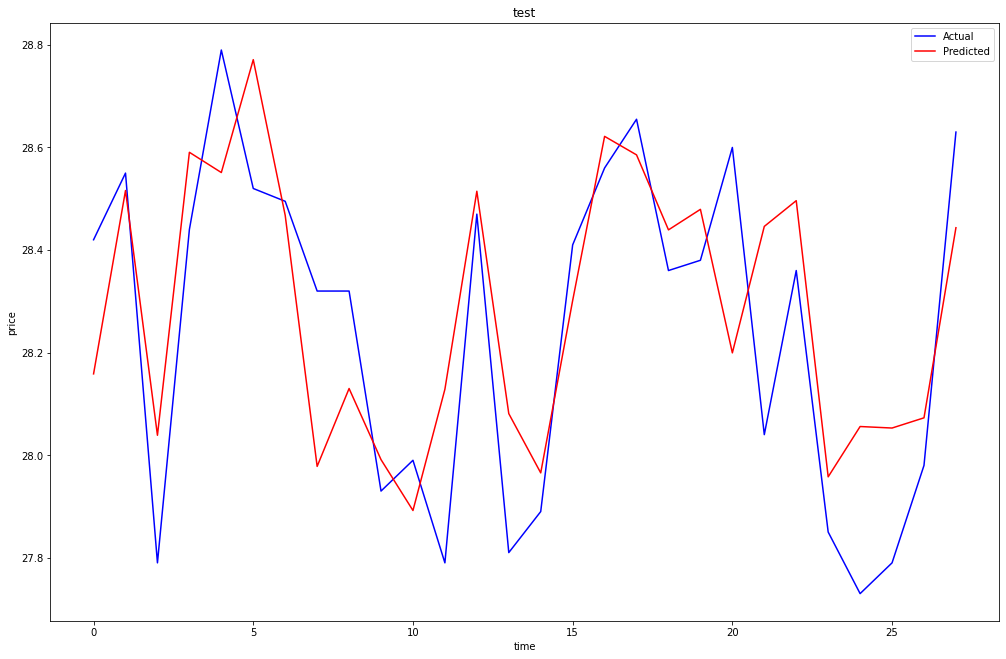

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.figure(figsize = (17,11))
    plt.plot(range(len(y_test)), y_test, color='blue', label = 'Actual')
    plt.plot(range(len(y_pred)), y_pred_reg, color='red' , label = 'Predicted' )
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('price')
    plt.title(regressorName)
    plt.show()
    return

plotGraph(y_test, y_pred_reg, "test") 

In [ ]:
y_train.shape

(64,)

In [ ]:
x_train.shape

(64, 5)

In [ ]:
# y_pred_reg_train = model.predict(x_train)
# print(y_pred_reg_train.shape , y_train.shape)
# plotGraph(y_train, y_pred_reg_train, "train") 

In [ ]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import Ridge 

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model1 = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model1, x_train, y_train, cv=kfold, scoring=scoring)
print(results.mean()) 

-0.042213590190397554


In [ ]:
model1.fit(x_train , y_train)

y_pred_ridge = model1.predict(x_test)

mean_squared_error = np.mean((y_pred_ridge - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error) 

Mean squared Error on test set :  0.04676435362910918


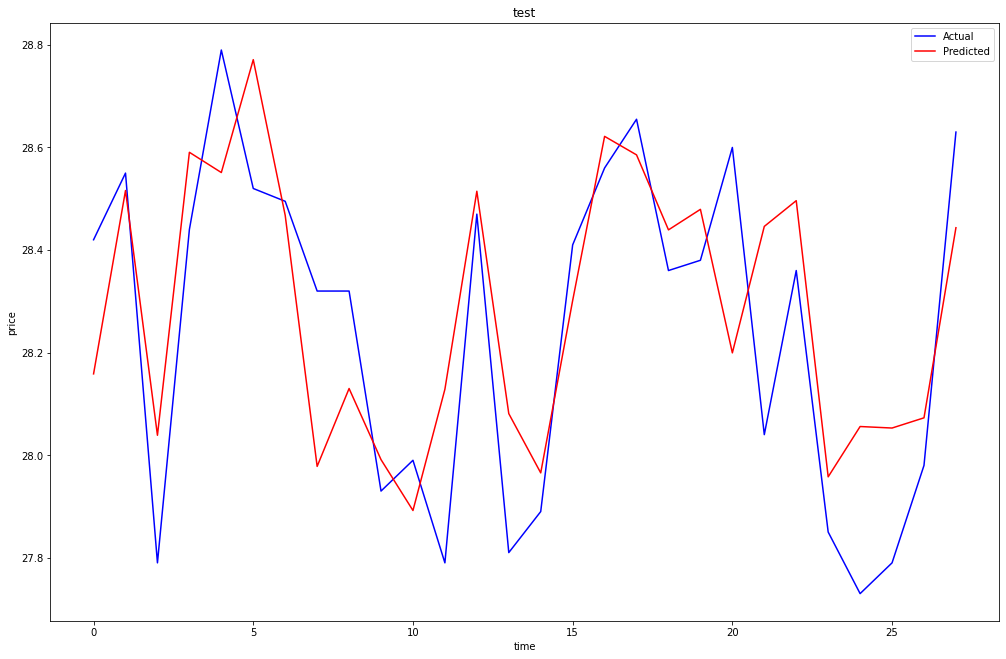

In [ ]:
plotGraph(y_test, y_pred_ridge , "test") 

In [ ]:
class LassoRegression() :
      
    def __init__( self, learning_rate, iterations, l1_penality ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
        self.l1_penality = l1_penality
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
          
        dW = np.zeros( self.n )
          
        for j in range( self.n ) :
              
            if self.W[j] > 0 :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         + self.l1_penality ) / self.m
          
            else :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         - self.l1_penality ) / self.m
  
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b

In [ ]:
model_lasso = LassoRegression( iterations = 1000, learning_rate = 0.01, l1_penality = 1000 )
model_lasso.fit(x_train , y_train)
y_pred_lasso_own = model_lasso.predict(x_test)

mean_squared_error = np.mean((y_pred_lasso_own - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  0.14115344369365423


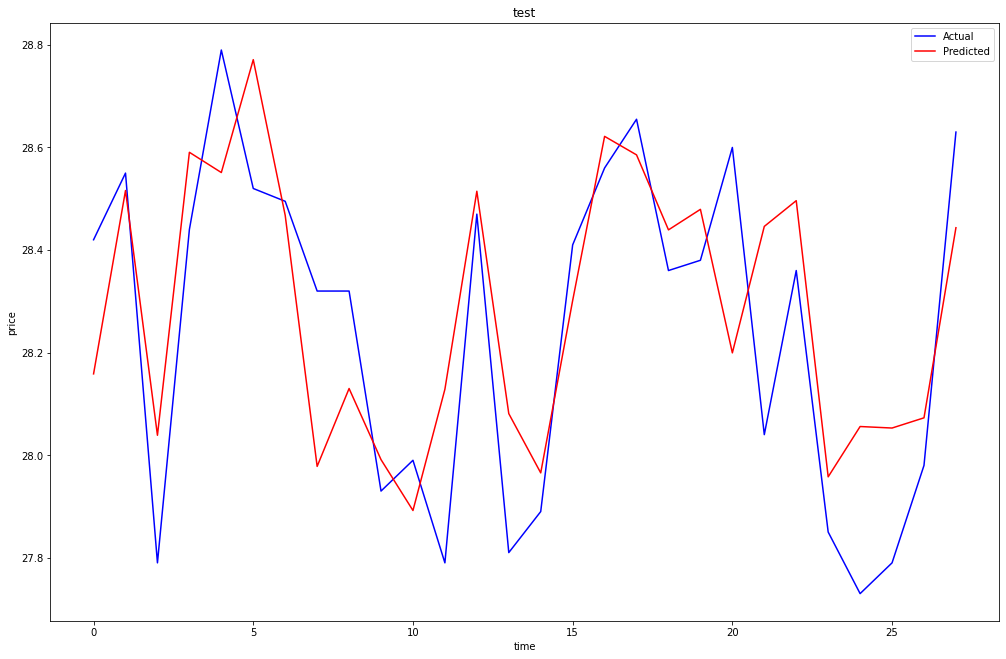

In [ ]:
plotGraph(y_test, y_pred_lasso_own , "test") 